# Playing Time Influenced by Gender as a Predictor for Game Newsletter Subscription
By Group 23 (Aayush, Kathleen, QingYou, Gordon) 

## Introduction
#### Background:

Online games increasingly rely on newsletter subscriptions as a tool to boost user engagement, communicate updates, and promote new features. Understanding what motivates players to subscribe provides valuable insights for developers and marketers aiming to tailor experiences to a diverse player demographic. Given Minecraft’s massive reach and cultural impact, it serves as a suitable vessel for this kind of behavioral analysis. Through PLAICraft, a browser-based Minecraft server created by the Pacific Laboratory for Artificial Intelligence (PLAI), researchers were able to collect detailed player and session data. This data, especially the player demographic data, offers an ideal opportunity to examine patterns in different variables like gender, age, played hours or expereince. By analyzing these patterns, we ourselves can aim to uncover which player characteristics are most predictive of other factors such as game-related newsletter subscriptions. Understanding what motivates players to subscribe can help improve marketing and tailor experiences for different people and games.

#### Question

**General Question:**

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? (Question 1)

**Specific Interpretation:**

Can a player's played hours and age predict subscription status in the players dataset? 

#### Dataset Overview

To answer this question, we will use the players.csv file to create a KNN classifier that predicts subscription status. The `players` dataset includes 196 observations and 7 variables (1372 values) describing player demographic information. The dataset size is sufficient for meaningful predictive modeling. The variables are given below.

| Variable | Type | Description |
|--------|----|-----------|
| `experience` | character | Player's skill level |
| `subscribe` | logical | Indicates whether player subscribed to a game-related newsletter |
| `hashedEmail` |character | Unique identifier for each player (hashed) |
| `played_hours` | numeric | The total hours the player has played |
| `name` | character | Player's name |
| `gender` | character | Gender |
| `Age` | numeric | Player's age |

Some brief summary statistics of the quantitative variables in the `players` dataset:
| Statistic | `played_hours` | `Age` |
| ---- | ---- | ---- |
| count | 196 | 194 |
| mean | 5.845918 | 20.52062 |
| median | 0.1 | 6.174667 |
| standard deviation | 28.35734 | 19 |
| min | 0 | 8 | 
| max | 223.1 | 50 | 

Some issues in the dataset are listed here:
* There might be some subjective inconsistencies with `experience` if it was self-reported.
* `Age` has 2 missing values.
* `experience` should be factor variables.
* Distribution imbalances in variables like `subscribed`, `gender`, and `Age`.

Response variable:
* `subscribe`: Inidcates whether a player is subscribed to a game-related newsletter or not and is what we aim to predict.

Explanatory variables:

* `played hours`: In-game engagement time likely impacts the likelihood of players seeking out more game-information on newsletters.
* `age`: A player's age likely plays a role in how involved they are with games and to an extension, game-related media like newsletters.

## Methods and Results

We will be training a KNN classifier off our player data in order to see if we can predict subscription status based on a player's played hours and age.

#### Step 1: Loading Libaries and Data

We'll first load some libraries that we'll (absolutely or possibly) need. Then we'll read in our players dataset using a URL so that this project is able to run on different devices.

In [21]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

In [22]:
players <- read_csv('https://raw.githubusercontent.com/kathleenramsey/dsci100_group23/main/Project%20Planning%20Players.csv')
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


#### Step 2: Wrangling and Preparing Data

After loading in the data, we'll tidy it by changing the datatypes of `experience` and `gender` into factor variables. We'll also go on and remove the two rows that have missin `Age` variables. This shouldn't affect our analysis all too much as it's just two rows and not that substantial.

In [89]:
players_tidy <- players |>
    mutate(experience = as_factor(experience),
           gender = as_factor(gender)) |>
    filter(is.na(Age) == FALSE)
players_tidy

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


#### Step 3: Summary of Exploratory Data

Below we are getting some statistics on the variables from our players dataset we will use for our analysis. We can see roughly 3/4 of the players are subscribed to a game-related newspaper. We can see that the mean age of the players are around 20 and that there is a clear inbalance in `played_hours` as seen with the median.

In [92]:
`subscription_%` <- players_tidy |>
    group_by(subscribe) |>
    summarize(count = n()) |>
    mutate(percentage = (count / sum(count)) * 100)
`subscription_%`

age_summary <- players_tidy |>
    summarize(mean = mean(Age, na.rm = TRUE),
              sd = sd(Age, na.rm = TRUE),
              median = median(Age, na.rm = TRUE),
              min = min(Age, na.rm = TRUE),
              max = max(Age, na.rm = TRUE))
age_summary

played_hours_summary <- players_full |>
    summarize(mean = mean(played_hours, na.rm = TRUE),
              sd = sd(played_hours, na.rm = TRUE),
              median = median(played_hours, na.rm = TRUE),
              min = min(played_hours, na.rm = TRUE),
              max = max(played_hours, na.rm = TRUE))
played_hours_summary

subscribe,count,percentage
<lgl>,<int>,<dbl>
FALSE,52,26.80412
TRUE,142,73.19588


mean,sd,median,min,max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20.52062,6.174667,19,8,50


mean,sd,median,min,max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6.171351,29.15973,0.1,0,223.1


### Visualizations

We'll explore some vizualisations to better understand our variables and their relationships with each other. 

**Figure 1: Play time distribution**

The histogram below shows what we mentioned earlier about the pretty substantial inbalance in `played_hours` amongst players. A huge majority of players have single-digit and near 0 hours played. Included in the plot is the distinction between those who are subscirbed and those who aren't subscribed to a game-related newspaper. We can see that ,unsurprisingly, most of the those not subscribed have lower or no hours.

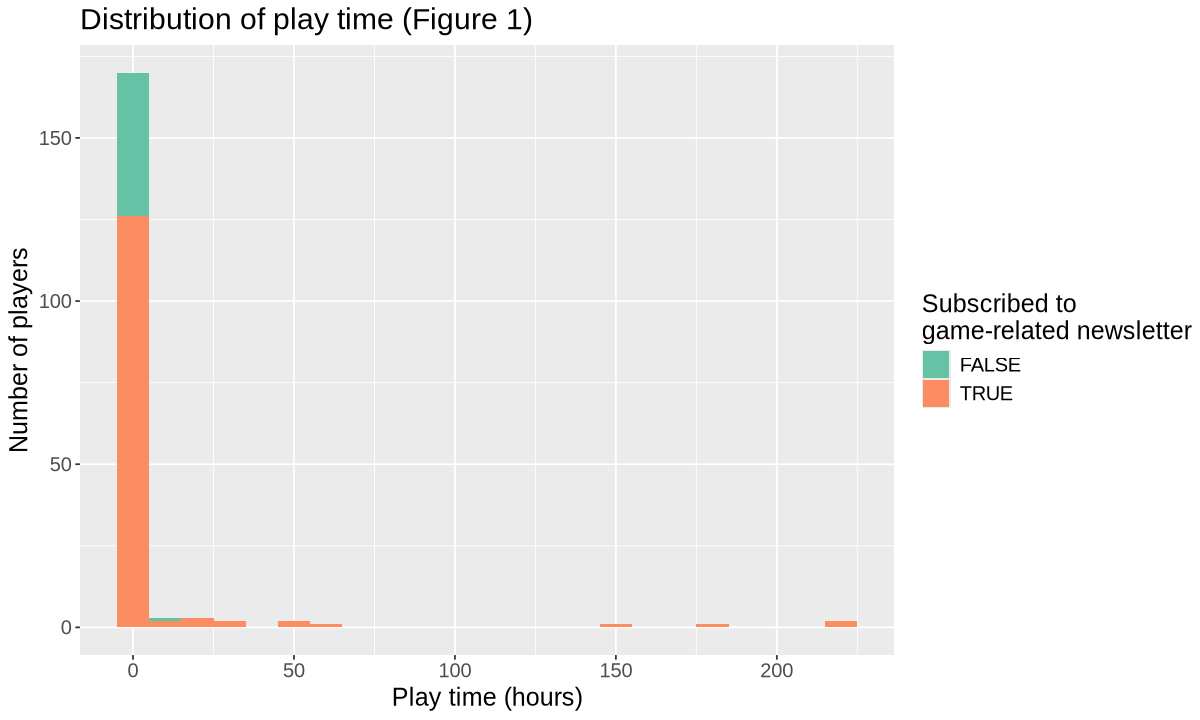

In [25]:
options(repr.plot.height = 6, repr.plot.width = 10)

player_hist <- players_full |>
    ggplot(aes(x=played_hours, fill=subscribe)) +
    geom_histogram(binwidth=10) +
    labs(x='Play time (hours)',
         y='Number of players',
         fill='Subscribed to\ngame-related newsletter',
         title = 'Distribution of play time (Figure 1)') +
    theme(text = element_text(size = 15)) +
    scale_fill_brewer(palette = "Set2")
player_hist

**Figure 2: Distribution of gender groups (gender diverse and male)**

The bar graph below shows how much of males and gender diverse players there are. There are over half male players than there are of other genders. 

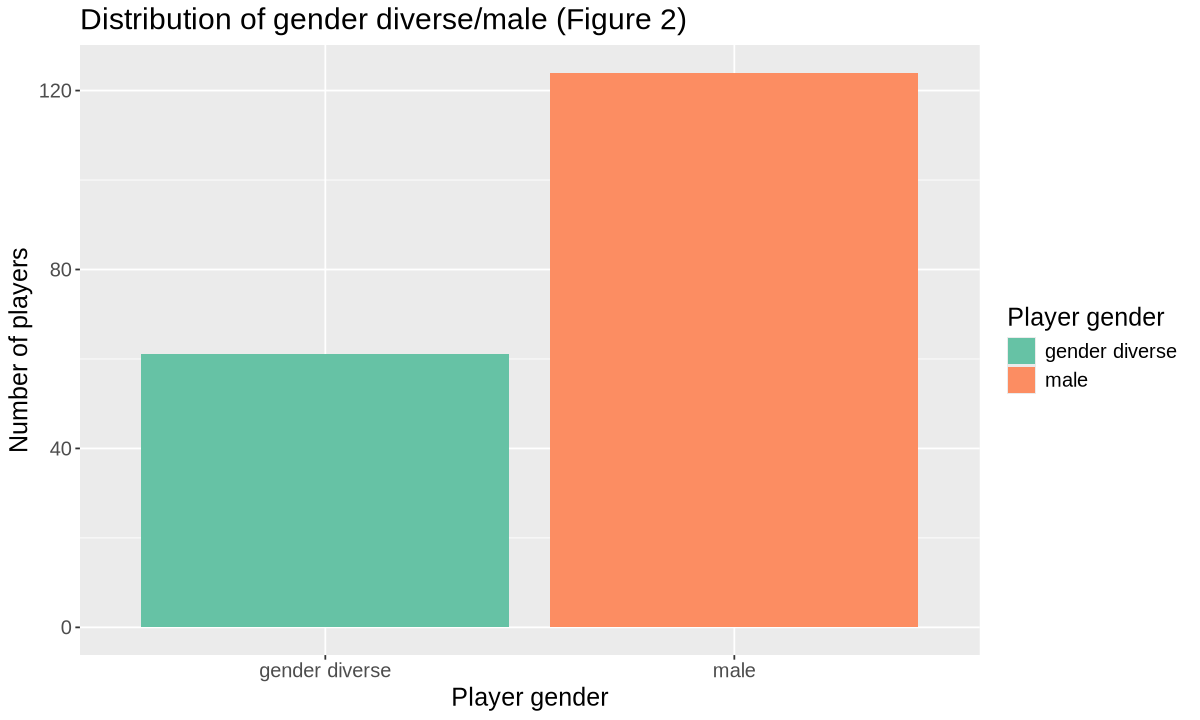

In [26]:
options(repr.plot.height = 6, repr.plot.width = 10)

gender_dist <- players_full |>
    ggplot(aes(x = gender, fill = gender)) +
    geom_bar(stat= 'count') +
    labs(x = 'Player gender', 
         y = 'Number of players', 
         fill = 'Player gender',
         title = 'Distribution of gender diverse/male (Figure 2)') +
    theme(text = element_text(size = 15)) +
    scale_fill_brewer(palette = "Set2")
gender_dist

**Figure 3: Subscription rate of gender groups (gender diverse and male)**

The bar graph below shows the rate of subscription for male players and players of other genders. We made the plot by converting the `subscribe` variable into a numerical (0/1) and used `mean()` to calculate the `subscribe_rate`. We can see that the rate at which gender diverse players subscribe are slightly higher (approx. 0.02) than the subscription rate of male players. This bar shows taht while the amount of gender diverse players are lesser, the rate of subscribing to a game related newsletter is much higher. 

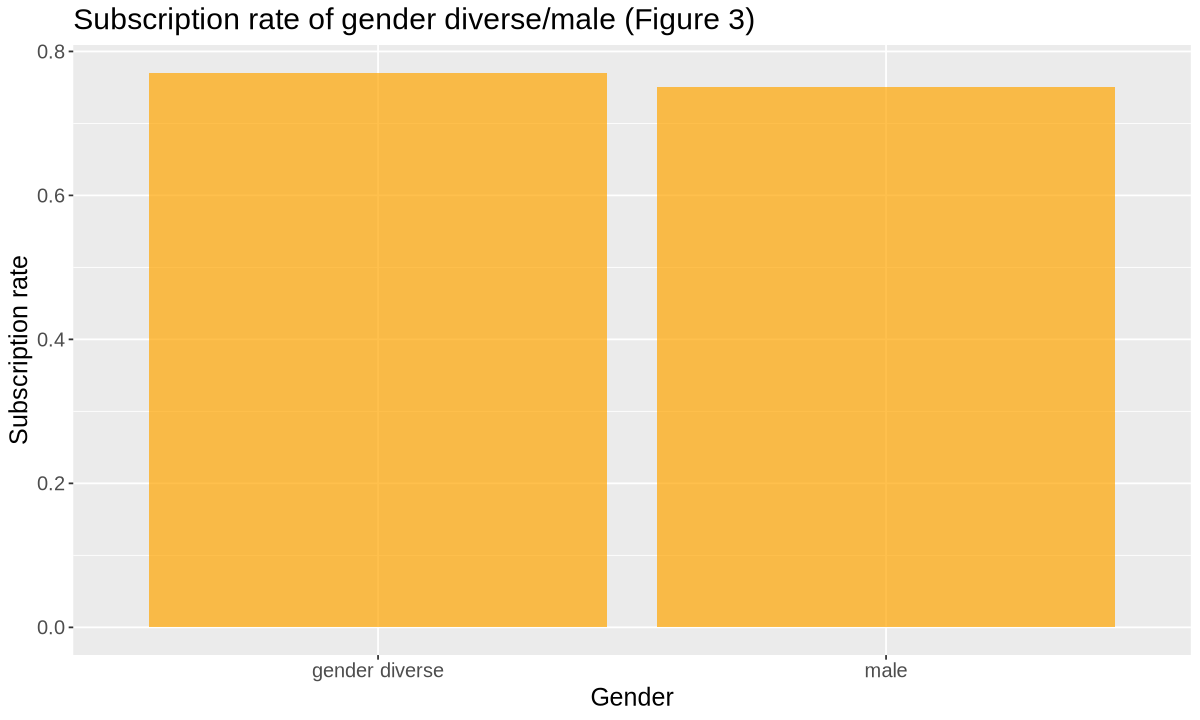

In [27]:
options(repr.plot.height = 6, repr.plot.width = 10)

subscription_bar <- players_full |>
    mutate(subscribe = as.numeric(if_else(subscribe == "TRUE", TRUE, FALSE))) |>
    group_by(gender) |>
    summarize(subscribe_rate = mean(subscribe, na.rm = TRUE)) |>
    ggplot(aes(x = gender, y = subscribe_rate)) +
        geom_bar(stat = "identity", fill = "orange", alpha = 0.7) +
        labs(title = "Subscription rate of gender diverse/male (Figure 3)",
             x = "Gender",
             y = "Subscription rate") +
        theme(text = element_text(size = 15))
subscription_bar

### Data Analysis
Make training/testing splits. Train one classifier on data with all genders, choose optimum k

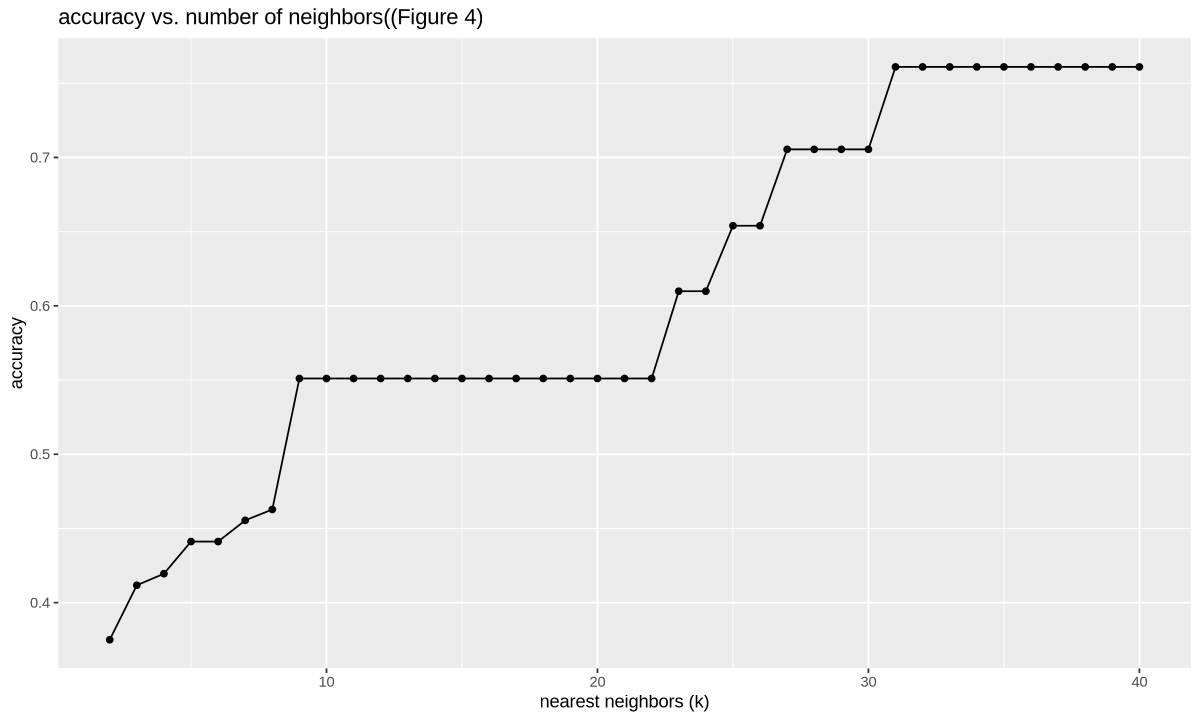

In [44]:
# refer to worksheets/tutorials on classification ???
# use a CV (probably 4-fold) to do training/validation only on the players_full set, not the split sets
# i don't think that the split sets have enough data points to do a good train/test split and still get reliable results from CV
# so if we can find a k value with just the full set we can use that k value for the split sets too.

set.seed(23) 

full_split <- initial_split(players_full, prop = 0.75, strata = subscribe)
full_train <- training(full_split)
full_test <- testing(full_split)

k_vals <- tibble(neighbors = c(2:40))
knn_vfold <- vfold_cv(full_train, v = 4, strata = subscribe)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_recipe <- recipe(subscribe ~ played_hours, data = full_train)

knn_workflow <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_tune)

knn_results <- tune_grid(
    knn_workflow,
    resamples = knn_vfold,
    grid = k_vals
)

knn_metrics <- knn_results |>
    collect_metrics() |>
    filter(.metric == "accuracy")

cross_val_plot <- knn_metrics |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(title = "accuracy vs. number of neighbors((Figure 4)",
         x = "nearest neighbors (k)",
         y = "accuracy")

print(cross_val_plot)

Figure 4 shows that the best k we can choose is between 30-40.

3. Using the optimal k found earlier, train classifiers on split data

In [35]:
set.seed(23)

best_k <- 32

knn_model2 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")


knn_workflow2 <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_model2)

knn_fit <- fit(knn_workflow2, data = full_train)

To build our final classification model, we used the K-Nearest Neighbors (KNN) algorithm with the optimal number of neighbors set to 32. This value was chosen because earlier cross-validation results showed that values of k between 32 and 40 produced the same accuracy. We set the KNN model to use rectangular weighting, meaning each of the nearest neighbors contributes equally to the classification decision. The model was then combined with a preprocessing recipe in a workflow to ensure the data is processed the same way each time the model is trained or used for prediction. Finally, we trained this workflow on the full training dataset so the model could learn the relationship between a player’s total played hours and their likelihood of subscribing to the newsletter. This trained model is used to evaluate prediction accuracy and explore how player characteristics, like gender, affect model performance.

4. Evaluate classifiers, gather skill metrics, compare and discuss

In [36]:
# this is kind of discussion territory but we can see how the flow of the analysis goes
knn_preds <- predict(knn_fit, new_data = full_test)

knn_results <- bind_cols(knn_preds, full_test)

knn_metrics <- knn_results |>
  metrics(truth = subscribe, estimate = .pred_class)|>
  filter(.metric=="accuracy")

print(knn_metrics)


# A tibble: 1 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary         0.617


First, we use the `predict` function to make predictions using the trained KNN model (`knn_fit`) on the full test data (`full_test`). These predictions are stored in `knn_preds`. Then, we combine the predictions (`knn_preds`) with the actual test data (`full_test`) using `bind_cols`, creating the `knn_results` dataset.

Next, we calculate the evaluation metrics for the KNN model by using the `metrics` function. We specify that the true values are in the `subscribe` column and the predicted values are in the `.pred_class` column. We filter the results to only include the accuracy metric by using `filter(.metric == "accuracy")`.

Finally, we print the accuracy of the KNN model using `print(knn_metrics)`.

In [40]:
# Train KNN model for male players and make predictions for male players in the test set
knn_fit_male <- knn_workflow2 |>
  fit(data = players_male)

knn_preds_male <- predict(knn_fit_male, new_data = players_male)

knn_results_male <- bind_cols(knn_preds_male, players_male)

# Calculate evaluation metrics for male players
knn_metrics_male <- knn_results_male |>
  metrics(truth = subscribe, estimate = .pred_class)|>
  filter(.metric=="accuracy")

print(knn_metrics_male)

# A tibble: 1 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary          0.75


We train the KNN model specifically for male players by using `knn_workflow2` and applying it to the `players_male` dataset. The trained model is stored in `knn_fit_male`.Then we use this model (`knn_fit_male`) to make predictions for the male players in the test set. We filter the `full_test` dataset to only include male players, then pass this filtered data to the `predict` function. The predictions are stored in `knn_preds_male`.
After that, we combine the predictions (`knn_preds_male`) with the corresponding actual test data for male players using `bind_cols`, creating the `knn_results_male` dataset.We then calculate the evaluation metrics for the KNN model on male players by using the `metrics` function. We specify that the true values are in the `subscribe` column and the predicted values are in the `.pred_class` column. We filter the results to only include the accuracy metric using `filter(.metric == "accuracy")`.Finally, we print the accuracy of the KNN model for male players using `print(knn_metrics_male)`.

In [41]:
# Train the KNN model for gender-diverse players and make predictions for gender-diverse players in the test set
knn_fit_gd <- knn_workflow2 |>
  fit(data = players_gd)

knn_preds_gd <- predict(knn_fit_gd, new_data = players_gd)

knn_results_gd <- bind_cols(knn_preds_gd, players_gd)

# Calculate evaluation metrics for gender-diverse players
knn_metrics_gd <- knn_results_gd |>
  metrics(truth = subscribe, estimate = .pred_class)|>
  filter(.metric=="accuracy")

print(knn_metrics_gd)

# A tibble: 1 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary         0.770


In this step, we train the KNN model specifically for gender-diverse players by using `knn_workflow2` and applying it to the `players_gd` dataset. The trained model is stored in `knn_fit_gd`.

Next, we use this model (`knn_fit_gd`) to make predictions for gender-diverse players in the test set. We filter the `full_test` dataset to only include gender-diverse players, then pass this filtered data to the `predict` function. The predictions are stored in `knn_preds_gd`.

After that, we combine the predictions (`knn_preds_gd`) with the corresponding actual test data for gender-diverse players using `bind_cols`, creating the `knn_results_gd` dataset.

We then calculate the evaluation metrics for the KNN model on gender-diverse players by using the `metrics` function. We specify that the true values are in the `subscribe` column and the predicted values are in the `.pred_class` column. We filter the results to only include the accuracy metric using `filter(.metric == "accuracy")`.

Finally, we print the accuracy of the KNN model for gender-diverse players using `print(knn_metrics_gd)`.

This process is similar to the steps followed for male players, where we trained the model for male players, made predictions, and evaluated accuracy. Here, we are doing the same for gender-diverse players, ensuring that the model performance is evaluated for different player groups.

### Summary of Results (Accuracy):

1. **Accuracy for the full dataset (all players): 0.617** (61.7%)

2. **Accuracy or male players: 0.75** (75%)

3. **Accuracy for gender-diverse players: 0.77** (77%)

### Interpretation:
- The model performs reasonably well for the full dataset with an accuracy of 61.7%.
- The model performs better for male players, achieving an accuracy of 75%.
- The model works best for gender-diverse players, with an accuracy of 77%. This suggests that the model is more accurate at predicting subscription behavior for gender-diverse players compared to male players.

5.creates a visualization of the analysis


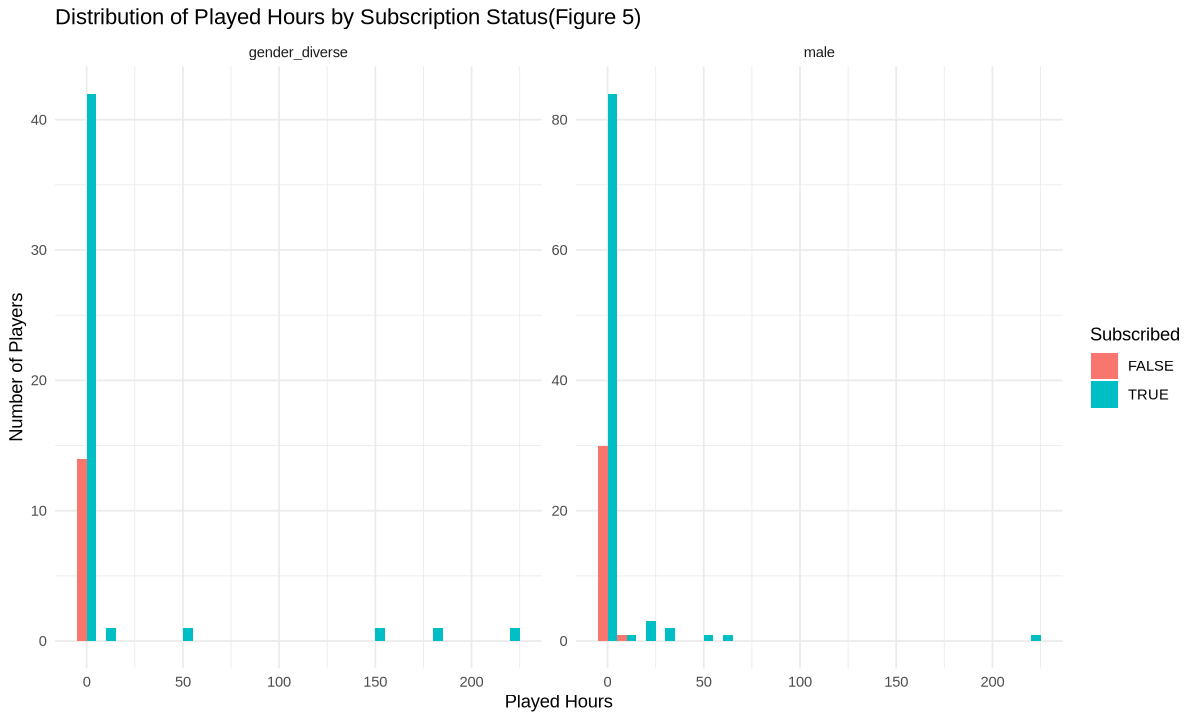

In [45]:
options(repr.plot.height = 6, repr.plot.width = 10)
# Combine all player data for the plot
players_full <- players |>
  select(subscribe, played_hours, gender) |>
  filter(gender != 'Prefer not to say') |>
  mutate(gender = if_else(gender == "Male", "male", "gender_diverse")) |>
  mutate(subscribe = as.factor(subscribe))

# Create a histogram for all players
ggplot(players_full, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(binwidth = 10, position = "dodge") +
  labs(
    title = "Distribution of Played Hours by Subscription Status(Figure 5)",
    x = "Played Hours",
    y = "Number of Players",
    fill = "Subscribed"
  ) +
  theme_minimal() +
  facet_wrap(~gender, scales = "free") 


### Explanation:
- **`geom_histogram()`**: Creates the histogram, where `binwidth` specifies the width of each bar in the histogram.
- **`position = "dodge"`**: This separates the bars for players who subscribed and those who did not.
- **`facet_wrap(~gender)`**: This creates separate histograms for male and gender-diverse players, allowing for easy comparison between the groups.
- **`labs()`**: Adds titles and axis labels to the plot.

This visualization will help us see how the distribution of played hours differs between subscribed and non-subscribed players and also how this pattern might vary between male and gender-diverse players.

## Discussion

### Summary of Findings:
The KNN models trained on different groups of players showed that total played hours is an important factor in predicting whether a player subscribes to a game-related newsletter. Players who spend more time playing the game are more likely to subscribe to the newsletter. This trend was observed in both male and gender-diverse players, though the model's performance varied across these groups.

- **For all players (combined):** The model had an accuracy of 61.7%. This suggests that total played hours can provide a moderate prediction of subscription likelihood across the full player base.
- **For male players:** The accuracy was 75%, indicating that played hours are an important predictor, but the model's performance is more reliable for male players than for the full dataset.
- **For gender-diverse players:** The accuracy was 77%, suggesting that played hours are a particularly strong predictor for this group. Gender-diverse players might have a clearer connection between their in-game time and subscription behavior compared to male players.

### Is this what you expected to find?

- **Expected Outcomes**: We thought that total played hours would be an important factor for predicting newsletter subscriptions because players who play more may want to get more information, like newsletters. This fits with our expectations, as time spent in the game likely shows an interest in staying informed about game updates, events, and other content.
  
- **Unexpected Outcomes**: The difference in model performance between male and gender-diverse players was surprising. We thought played hours would be useful for both groups, but the model did better for gender-diverse players. This means that their behavior in the game might match their subscription choices more clearly. It also shows that gender might affect not just the chance of subscribing but also how players react to game marketing. This could depend on their interests, gaming habits, or how much they engage with the game community.

The lower accuracy for male players suggests that there are other factors—possibly not in this dataset—that influence their decision to subscribe to newsletters. It may also mean that male players’ subscription behavior is less linked to in-game hours, or that including other features (like experience or age) would improve the model for this group.

In conclusion, the analysis showed that played hours is an important predictor for newsletter subscriptions, but it works better for gender-diverse players. This means that while played hours are helpful, exploring more features and improving the model (especially for male players) could make predictions more accurate for all players. Gender differences in how played hours predict subscription behavior could also be interesting to study further, as they may help us understand player behavior and improve marketing strategies.

### What impact could such findings have?

Our findings and results emphasize how crucial it is to take gender diversity into consideration when developing predictive models for user behavior analysis:

**Targeted Marketing Strategies:** Since we have shown that subscription behaviour is more predictable for gender-diverse and male players, companies can use this insight to create effective advertisements aimed at these players without over-targeting or overlooking certain groups.

**Gaming Product Design:** Game developers can explore why gender-diverse and male users like their game and newsletter and then use those discoveries to create more inclusive, engaging game features.

**Encourages Inclusive Data Science Methods:** Our research highlights the importance of including a wide range of demographics groups when collecting data in order to gain a more complete picture of user behaviour.

**Discovering Hidden Model Biases:** The discrepancy between our overall accuracy (61.7%), male-only accuracy (75%), and gender-diverse accuracy (77%) demonstrates that certain subgroups may underperform or excel with specific models. This shows that data analysis should always involve subgroup analysis when evaluating accuracy of a given model.

### What future questions could this lead to?

Our findings and results open the door to a variety of thought-provoking questions that require further analysis to answer such as:

1. Why is the subscription predictive accuracy so low for the complete dataset? If we used models for each subgroup of gender, would all of them produce greater accuracies?

2. What reasons do different genders value the game and newsletter for? Is it the actual content of the game? Are certain genders more likely to develop an emotional connection? For instance, some players may feel a stronger emotional attachment because of the inclusivity and representation in the game and the community. Are certain genders more likely to rely on the newsletter or external sources for updates on the game?

3. How might other factors and their interactions with gender affect subscription predictability? For example, what would change if we also used experience or age as predictors?

4. How would our results change in larger datasets or different types of games?
